### **Example 2:**
We will use a small Neural Network (NN) to predict the digit, from 0 to 9, writen on an image.

<br>

[Idoia Ochoa](https://portalcientifico.unav.edu/investigadores/329427/detalle) (Tecnun, University of Navarra)

<br>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iochoa/JII-GradoIA/blob/main/notebooks/JII_2_mnist_example_2024.ipynb)


## Common imports and loading data

In [5]:
import keras
import random
keras.__version__


'3.4.1'

We will now load the dataset, denoted as MNIST, composed of images representing hand-writen digits. We also have access to the labels, i.e., the digit (number) writen in each image.

When downloading the dataset, we will already split the data into training and testing sets. The idea is to train the NN on the training data, and then analyze its performance on the test data.

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's check the number of images in the train and test sets, as well as their size.

In [3]:
num_train_images = train_images.shape[0]
num_test_images = test_images.shape[0]

width = train_images.shape[1]
height = train_images.shape[2]

print('Number of images in the training set is: ', num_train_images)
print('Number of images in the test set is: ', num_test_images)
print('Width is: ', width)
print('Height is: ', height)


Number of images in the training set is:  60000
Number of images in the test set is:  10000
Width is:  28
Height is:  28


Let's visualize some of the images and the corresponding labels

Label is:  4


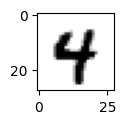

In [20]:
# Select the image and print its label
idx = random.randint(0, num_train_images) # You can modify the index to print other images
digit = train_images[idx]
print('Label is: ', train_labels[idx])

# Plot the image
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(1,1))
ax.imshow(digit, cmap=plt.cm.binary)

## Design and train a simple NN model to predict the digit in an image

Model architecture

In [21]:
# Define architecture
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(200, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Summary of the network

In [22]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         102,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 506,530 (1.93 MB)

 Trainable params: 506,530 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

Set the parameters for training the network

In [23]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Prepare the data for being input to the NN

In [24]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Prepare the labels for the NN

In [25]:
from keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [26]:
print(train_labels_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Train the NN to find the "optimal" parameters using ONLY the training dataa

In [27]:
network.fit(train_images, train_labels_cat, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8630 - loss: 0.4350
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9719 - loss: 0.0900
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9825 - loss: 0.0551
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9885 - loss: 0.0355
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9911 - loss: 0.0271


## Analyze the performance of the network on the TEST data

Let's first check the accuracy (% of correctly predicted digits) on the test data

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9791 - loss: 0.0751


In [29]:
print('The percentage of correctly predicted digits on the test data is: ', test_acc*100)

The percentage of correctly predicted digits on the test data is:  98.29999804496765


Let's plot a confusion matrix to check which digits are incorrectly predicted

In [30]:
y_pred = network.predict(test_images)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


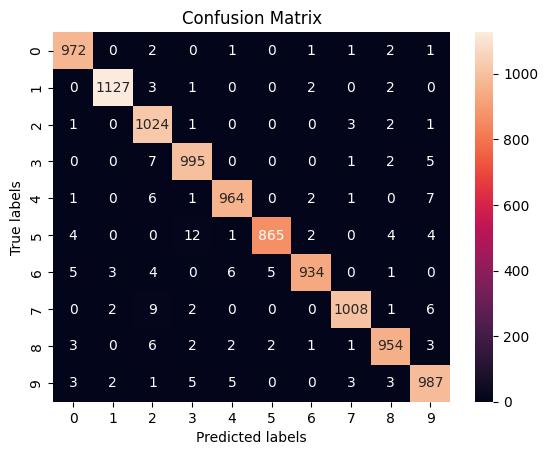

In [31]:
# Let's plot a confusion matrix
import sklearn.metrics as sklm
import seaborn as sns
import matplotlib.pyplot as plt

cm = sklm.confusion_matrix(test_labels, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');